**IT24103159 - Feature Selection**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Define the file path to the raw dataset on GitHub
file_path = 'https://raw.githubusercontent.com/Dilum-Alahakoon/AIML-Project/refs/heads/main/data/raw/IT24102944.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [3]:
# Displaying the first 5 rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Getting a summary of the dataset's information
print("\nDataset Info:")
df.info()

First few rows of the dataset:
  Survey_Date  Age               Industry  Hours_Per_Week  \
0  2025-06-01   27  Professional Services              64   
1  2025-06-01   37  Professional Services              37   
2  2025-06-01   32              Education              36   
3  2025-06-01   40              Education              63   
4  2025-06-01   52       Customer Service              61   

  Mental_Health_Status  Burnout_Level  Work_Life_Balance_Score  \
0      Stress Disorder              0                        3   
1      Stress Disorder              0                        4   
2                 ADHD              0                        3   
3                 ADHD              2                        1   
4              Burnout              2                        4   

   Social_Isolation_Score  Average_Salary  Physical_Issue_Count  ...  \
0                       2            50.0                     2  ...   
1                       2            90.0                    

In [4]:
# Dropping the 'Survey_Date' column
df = df.drop('Survey_Date', axis=1)

In [5]:
# Converting the 'Industry' column using one-hot encoding
# This creates multiple columns based on the industry type instead of a single column
df = pd.get_dummies(df, columns=['Industry'], drop_first=True)

In [6]:
# Encoding our target variable, the 'Mental_Health_Status' column
# Here, text values like 'Anxiety', 'Depression' are converted to numbers like 0, 1, 2
label_encoder = LabelEncoder()
df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])


In [7]:
# Viewing the dataset after preprocessing
print("\nDataset after preprocessing:")
print(df.head())
df.info()


Dataset after preprocessing:
   Age  Hours_Per_Week  Mental_Health_Status  Burnout_Level  \
0   27              64                     5              0   
1   37              37                     5              0   
2   32              36                     0              0   
3   40              63                     0              2   
4   52              61                     2              2   

   Work_Life_Balance_Score  Social_Isolation_Score  Average_Salary  \
0                        3                       2            50.0   
1                        4                       2            90.0   
2                        3                       2            90.0   
3                        1                       2            70.0   
4                        4                       3            70.0   

   Physical_Issue_Count  Physical_Health_Issues_Back Pain  \
0                     2                               0.0   
1                     1                         

In [8]:
# Separating the features (X) and the target variable (y)
X = df.drop('Mental_Health_Status', axis=1)
y = df['Mental_Health_Status']


Features to drop due to high correlation (1):
['Gender_Male']

Number of remaining features after dropping: 82


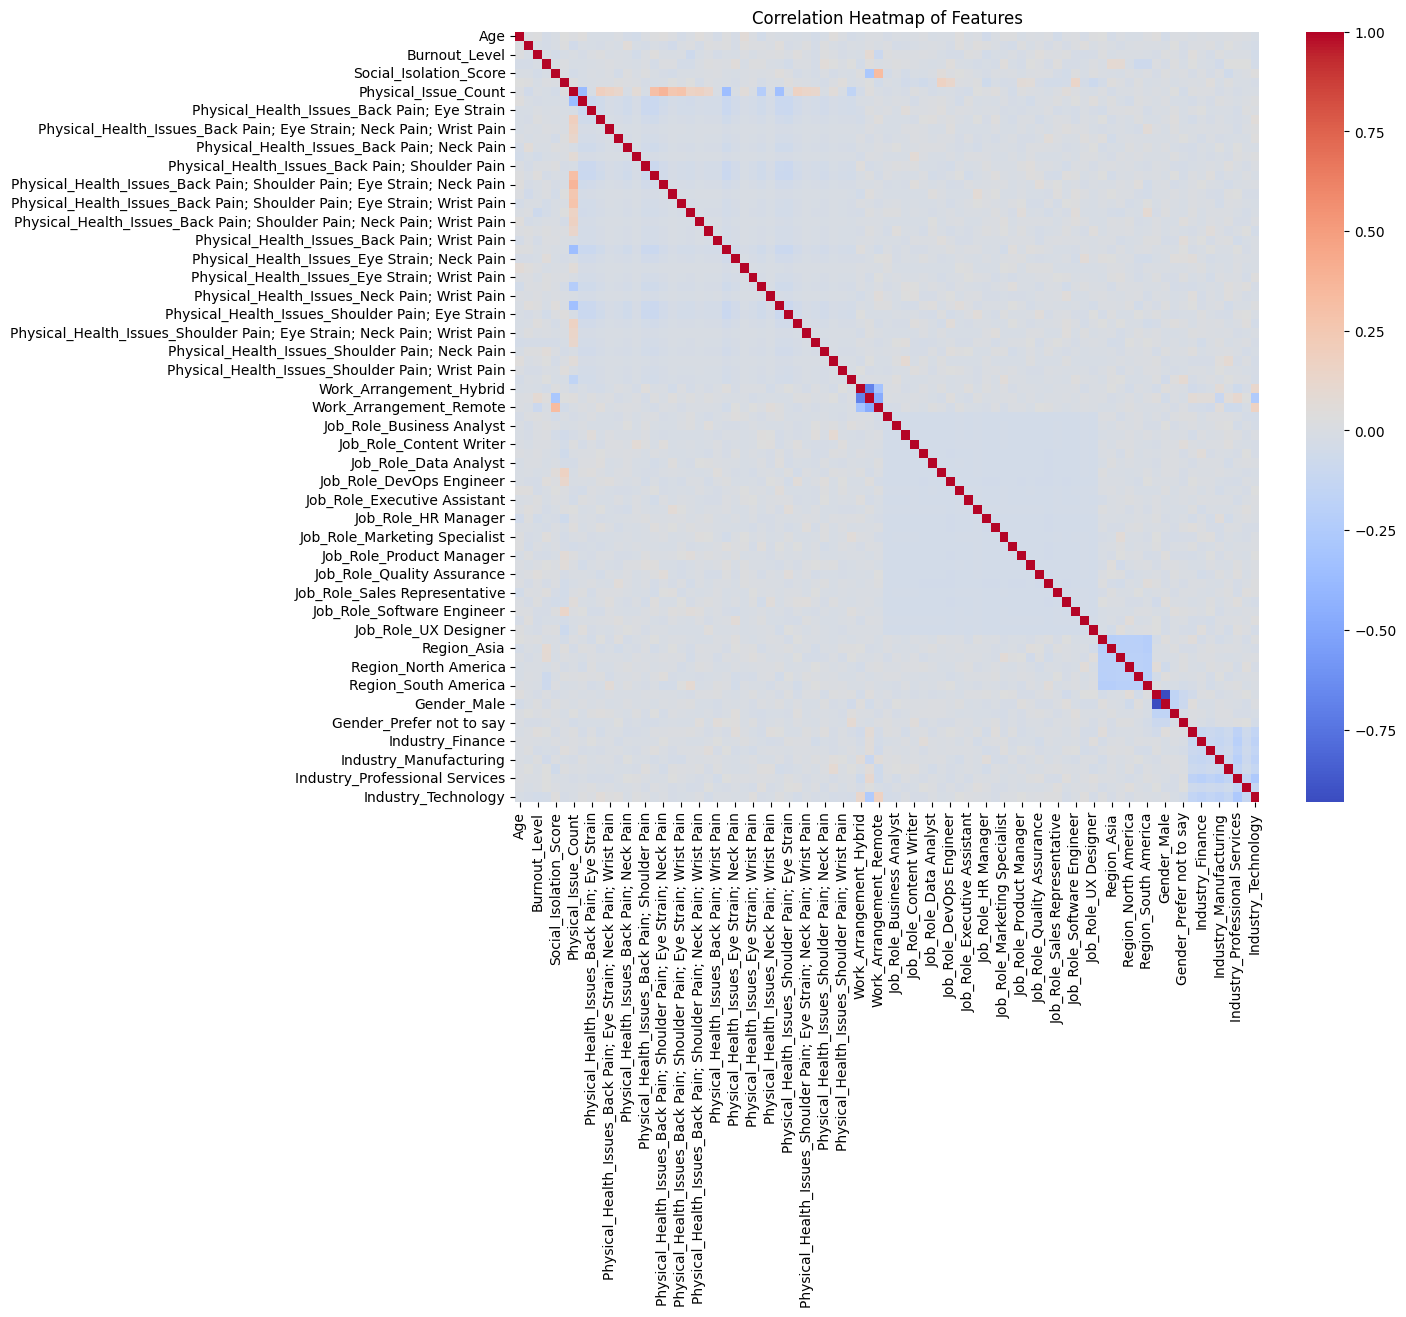

In [9]:
# Creating the correlation matrix of the features
corr_matrix = X.corr().abs()

# Selecting the upper triangle of the correlation matrix
# Because the matrix is symmetric, we only need to check one half
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identifying features with a correlation greater than 0.90 to add to the 'to_drop' list
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]

print(f"\nFeatures to drop due to high correlation ({len(to_drop)}):")
print(to_drop)

# Dropping these features from the DataFrame
X_filtered = X.drop(columns=to_drop)

print(f"\nNumber of remaining features after dropping: {X_filtered.shape[1]}")

# Visualizing the original correlation matrix with a heatmap (Optional)
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

In [10]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 82 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Age                                                                                 2358 non-null   int64  
 1   Hours_Per_Week                                                                      2358 non-null   int64  
 2   Burnout_Level                                                                       2358 non-null   int64  
 3   Work_Life_Balance_Score                                                             2358 non-null   int64  
 4   Social_Isolation_Score                                                              2358 non-null   int64  
 5   Average_Salary                                                                      2358 non-null


Feature Importances (Ranked):
                                              feature  importance
0                                                 Age    0.088685
1                                      Hours_Per_Week    0.086100
3                             Work_Life_Balance_Score    0.053302
5                                      Average_Salary    0.050238
4                              Social_Isolation_Score    0.050063
..                                                ...         ...
10  Physical_Health_Issues_Back Pain; Eye Strain; ...    0.001236
17  Physical_Health_Issues_Back Pain; Shoulder Pai...    0.001181
32  Physical_Health_Issues_Shoulder Pain; Eye Stra...    0.001031
35  Physical_Health_Issues_Shoulder Pain; Neck Pai...    0.000872
25  Physical_Health_Issues_Eye Strain; Neck Pain; ...    0.000814

[82 rows x 2 columns]


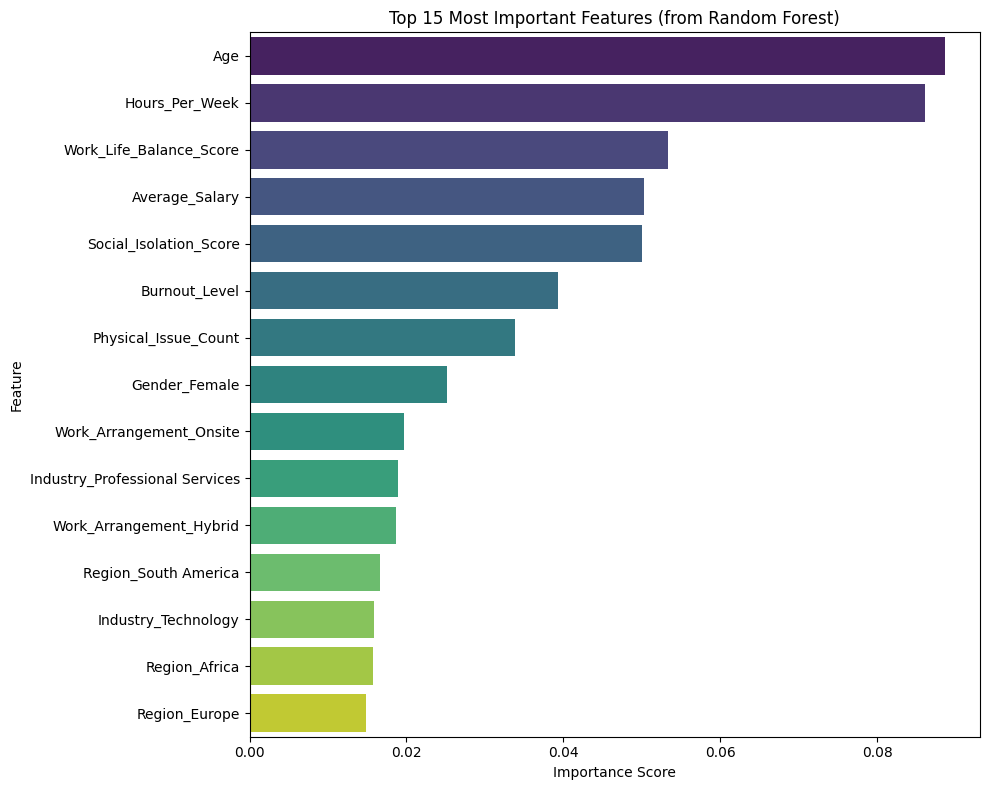


Final list of the selected top 15 features:
['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score', 'Average_Salary', 'Social_Isolation_Score', 'Burnout_Level', 'Physical_Issue_Count', 'Gender_Female', 'Work_Arrangement_Onsite', 'Industry_Professional Services', 'Work_Arrangement_Hybrid', 'Region_South America', 'Industry_Technology', 'Region_Africa', 'Region_Europe']


In [11]:
# Assuming 'X_filtered' and 'y' are available from the previous steps

# Creating a RandomForestClassifier model
# n_estimators is the number of trees in the forest
# random_state ensures that the results are reproducible
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Training the model using our filtered features and the target variable
model.fit(X_filtered, y)

# Getting the feature importances from the trained model
importances = model.feature_importances_

# Putting the feature importances into a pandas DataFrame and sorting them
feature_importance_df = pd.DataFrame({
    'feature': X_filtered.columns,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nFeature Importances (Ranked):")
print(feature_importance_df)

# Visualizing the top 15 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis', hue='feature', legend=False)
plt.title('Top 15 Most Important Features (from Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Selecting the list of the top 15 most important features
top_15_features = feature_importance_df.head(15)['feature'].tolist()

print("\nFinal list of the selected top 15 features:")
print(top_15_features)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 83 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Age                                                                                 2358 non-null   int64  
 1   Hours_Per_Week                                                                      2358 non-null   int64  
 2   Burnout_Level                                                                       2358 non-null   int64  
 3   Work_Life_Balance_Score                                                             2358 non-null   int64  
 4   Social_Isolation_Score                                                              2358 non-null   int64  
 5   Average_Salary                                                                      2358 non-null

In [13]:
# Assuming 'X_filtered' and 'top_15_features' are available from the previous steps

# We have the list of top 15 features selected by Random Forest from the previous step
# top_15_features = ['Burnout_Level', 'Work_Life_Balance_Score', 'Social_Isolation_Score', ...]

# Now, from the correlation-filtered DataFrame (X_filtered),
# we create a new DataFrame by selecting only those most important features.
# This will be our final feature set.
X_final = X_filtered[top_15_features]

# The target variable (y) remains the same.

#--------------------------------------------------------------
# From now on, you will use X_final and y for your future steps
#--------------------------------------------------------------

print("Final Features to be used in the Model (X_final):")
print(f"Number of features: {X_final.shape[1]}")
print(X_final.head())

print("\nTarget Variable (y):")
print(y.head())

Final Features to be used in the Model (X_final):
Number of features: 15
   Age  Hours_Per_Week  Work_Life_Balance_Score  Average_Salary  \
0   27              64                        3            50.0   
1   37              37                        4            90.0   
2   32              36                        3            90.0   
3   40              63                        1            70.0   
4   52              61                        4            70.0   

   Social_Isolation_Score  Burnout_Level  Physical_Issue_Count  Gender_Female  \
0                       2              0                     2            1.0   
1                       2              0                     1            1.0   
2                       2              0                     2            1.0   
3                       2              2                     2            1.0   
4                       3              2                     2            0.0   

   Work_Arrangement_Onsite  Industry_

In [14]:
# Save the final DataFrame with the new features to a CSV file.
X_final.to_csv('IT24103159.csv',index=False)